# Non-Linear Logistic Regression

In the last session we looked at the basic concepts of logistic regression.

- Logistic classification is about predicting one or another category.
- Models give us numerical values.
- The way to convert numerical values to categorical values is by using the *sigmoid*.
- A new penalty function that has small values if you guess very close to correctly and very large values otherwise (roughly).

In [1]:
# Import our usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set up the path
import os
# OS-independent way to navigate the file system
# Data directory is one directory up in relation to directory of this notebook
data_dir_root = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + "Data")
# Where the file is
file_url = data_dir_root + os.sep + "forged-bank-notes.csv"
#file_url

In [3]:
# Load the data
# header=0 drops the header row in the csv file
data = pd.read_csv(file_url, header=0, names=['V1', 'V2', 'V3', 'V4', 'Genuine'])

In [4]:
# Set up the inputs and 
# display the few rows of the input
inputs_v1_v2 = data[['V1', 'V2']]
inputs_v3_v4 = data[['V3', 'V4']]
inputs_v1_v3 = data[['V1', 'V3']]
inputs_v1_v4 = data[['V1', 'V4']]
inputs_v2_v3 = data[['V2', 'V3']]
inputs_v2_v4 = data[['V2', 'V4']]

Let's start where we left off last time.

We were looking at a bank notes dataset. The dataset has features V1, V2, V3, and V4.

We were looking just at V1 and V2 -- to keep things simple enough to visualize things easily.

We'll continue to look at V1 and V2...

In [5]:
# What the first few rows of the dataset looks like -- 
#  for just the V1 and V2 features.
inputs_v1_v2.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [6]:
# And here's what the first few lines of the outputs/targets

# Set up the output and 
# display the first few rows of the output/target
output = data[['Genuine']]
output.head()

,Genuine
0,0
1,0
2,0
3,0
4,0


In [7]:
# Set up the training data
X_train_v1_v2 = {'data': inputs_v1_v2.values, 'feature1': 'V1', 'feature2': 'V2'}
X_train_v3_v4 = {'data': inputs_v3_v4.values, 'feature1': 'V3', 'feature2': 'V4'} 
X_train_v1_v3 = {'data': inputs_v1_v3.values, 'feature1': 'V1', 'feature2': 'V3'}
X_train_v1_v4 = {'data': inputs_v1_v4.values, 'feature1': 'V1', 'feature2': 'V4'}
X_train_v2_v3 = {'data': inputs_v2_v3.values, 'feature1': 'V2', 'feature2': 'V3'}
X_train_v2_v4 = {'data': inputs_v2_v4.values, 'feature1': 'V2', 'feature2': 'V4'}
X_train_v1_v2['data'].shape

(1372, 2)

In [8]:
# Set up the target data 
y = output.values

# Change the shape of y to suit scikit learn's array shape requirements
y_train = np.array(list(y.squeeze()))
y_train.shape

(1372,)

In [9]:
# Set up the positive and negative categories
# Scatter of V1 versus V2
positive = data[data['Genuine'].isin([1])]
negative = data[data['Genuine'].isin([0])]

In [10]:
# Set up the logistic regression model from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# Solvers that seem to work well are 'liblinear' and 'newton-cg"
lr = LogisticRegression(C=100.0, random_state=0, solver='liblinear', verbose=2)

In [11]:
# Train the model and find the optimal parameter values
lr.fit(X_train_v1_v2['data'], y_train)

[LibLinear]

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

At this point, (just imagine that) we've:

- visualized the data
- defined the task we'd like to accomplish
- defined the model
- defined the penalty for the being wrong
- used an iterative algorithm (like gradient descent) to find the optimal values of the parameters

(Can you picture all of this from the dataset point of view?)

<img src="../Images/nonlinear-logistic-regression-1.png" alt="Table View 1" style="width:600px"/>

<img src="../Images/nonlinear-logistic-regression-2.png" alt="Table View 1" style="width:600px"/>

<img src="../Images/nonlinear-logistic-regression-3.png" alt="Table View 1" style="width:600px"/>

In [12]:
# These are the optimal values of w0, w1 and w2
w0 = lr.intercept_[0]
w1 = lr.coef_.squeeze()[0]
w2 = lr.coef_.squeeze()[1]
print("w0: {}\nw1: {}\nw2: {}".format(w0, w1, w2))

w0: 0.5865973329054549
w1: -1.1107052345243296
w2: -0.27255003089824


In [13]:
# Function for plotting class boundaries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def poly_boundary_plot(XTrain, YTrain, degree, show_contours=0):
    
    # XTrain has to have exactly 2 features for this visualization to work
    
    # Transform the training inputs
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(XTrain['data'])
    # NOTE: the poly function adds a bias value of 1 to each row of input data -- 
    #  default setting is include_bias=True
    
    # Set up the logistic regression model from SciKit Learn
    # Solvers that seem to work well are 'liblinear' and 'newton-cg"
    lr = LogisticRegression(C=100.0, random_state=0, solver='liblinear', verbose=2)
    
    # Fit the polynomial data to the simple linear logistic regression model we have
    lr.fit(X_train_poly, YTrain);
    
    # Create a grid of feature values
    
    # Find the min and max values of the two features 
    # Make grid values
    GRID_INCREMENT = 0.02
    x1_min = np.array([XTrain['data'][i][0] for i in range(len(XTrain['data']))]).min()
    x1_max = np.array([XTrain['data'][i][0] for i in range(len(XTrain['data']))]).max()
    
    x2_min = np.array([XTrain['data'][i][1] for i in range(len(XTrain['data']))]).min()
    x2_max = np.array([XTrain['data'][i][1] for i in range(len(XTrain['data']))]).max()
    
    xx1, xx2 = np.mgrid[x1_min:x1_max:GRID_INCREMENT, x2_min:x2_max:GRID_INCREMENT]
    #xx1.shape, xx2.shape
    
    # Create the grid
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid.shape
    
    # The predictions of the model
    preds_poly = lr.predict(poly.fit_transform(grid))
    preds_poly_probs = lr.predict_proba(poly.fit_transform(grid))
    preds_poly_probs_0 = np.array([preds_poly_probs[i][0] for i in range(len(preds_poly_probs))])
    preds_poly_probs_1 = np.array([preds_poly_probs[i][1] for i in range(len(preds_poly_probs))])
    
    #return preds_poly, preds_poly_probs, preds_poly_probs_0, preds_poly_probs_1
    
    # Where did the model misclassify banknotes?
    # Keep in mind we are only using V1 and V2
    ## CAUTION: USING EXISTING variable values here
    model_preds = lr.predict(X_train_poly)
    errors_poly = data[data['Genuine'] != model_preds]
    #errors_poly
    
    # Get some classification performance metrics
    accuracy = metrics.accuracy_score(YTrain, model_preds)
    report = metrics.classification_report(YTrain, model_preds)
    confusion_matrix = metrics.confusion_matrix(YTrain, model_preds, labels=None, sample_weight=None)
    
    # Plot the boundary
    fig, ax = plt.subplots(figsize=(15,10))

    ax.scatter(positive[XTrain['feature1']], positive[XTrain['feature2']], s=30, c='b', marker='.', label='Genuine')
    ax.scatter(negative[XTrain['feature1']], negative[XTrain['feature2']], s=30, c='r', marker='.', label='Forged')

    ax.set_xlabel(XTrain['feature1'])
    ax.set_ylabel(XTrain['feature2'])

    # Now plot black circles around data points that were incorrectly predicted
    ax.scatter(errors_poly[XTrain['feature1']], errors_poly[XTrain['feature2']], facecolors="none", edgecolors="m", s=80, label="Wrongly Classified")

    # Finally plot the line which represents the decision boundary
    #ax.plot(x1, x2, color="green", linestyle="--", marker=None, label="boundary")
    # And plot the contours that separate the 1s from the 0s
    plt.contour(xx1,xx2,preds_poly.reshape(xx1.shape), colors='g', linewidths=1)
    if show_contours == 1:
        # preds_poly_probs_0 for contours of probability of 0 -- i.e. prob(forged bank note)
        # preds_poly_probs_1 for contours of probability of 1 -- i.e. prob(genuine bank note)
        contour_probs = preds_poly_probs_1
        cs = plt.contour(xx1,xx2,contour_probs.reshape(xx1.shape), linewidths=0.7)
        plt.clabel(cs, inline=1, fontsize=12)

    ax.legend(loc='lower right')
    
    title = 'Logistic Regression\n'
    title = title + 'Bank Note Validation Based on Feature Values ' + XTrain['feature1'] + ' and ' + XTrain['feature2'] + '\n'
    title = title + 'Polynomial Degree: ' + str(degree) + '\n'
    title = title + 'Number of misclassified points = ' + str(len(errors_poly))

    plot = plt.title(title);
    
    return errors_poly, accuracy, confusion_matrix, report, plot

...and this is what we saw last time for linear logistic regression

[LibLinear]

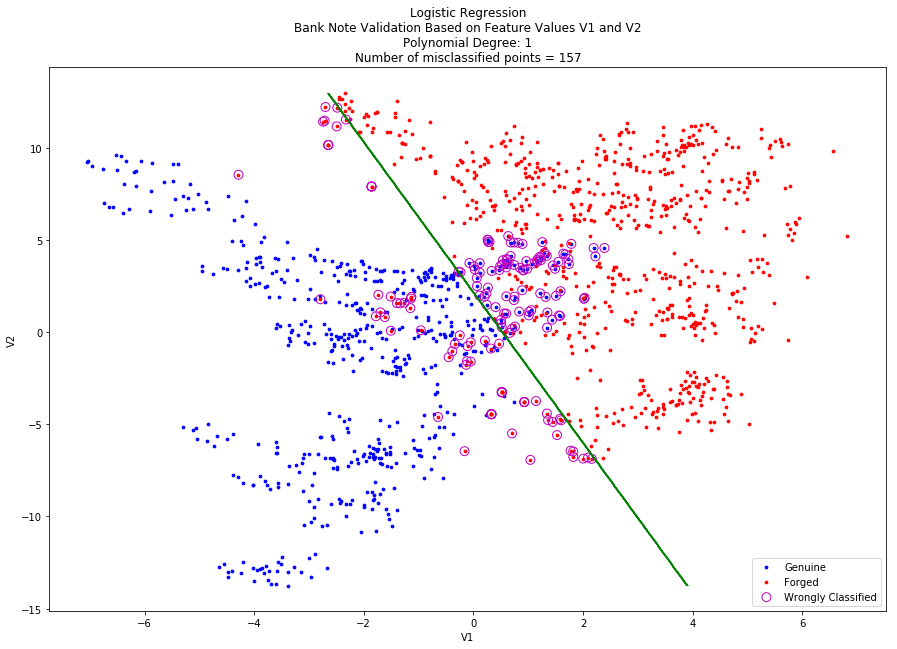

In [14]:
# logistic regression - what we saw last time
# NOTE: The contours are probabilities that the bank note is genuine
errors, accuracy, conf_matrix, report, plot = poly_boundary_plot(X_train_v1_v2, 
                    y_train, 
                    degree=1, 
                    show_contours=0)

In [15]:
# Which rows of the dataset are misclassfied?
errors

,V1,V2,V3,V4,Genuine
4,0.329240,-4.455200,4.57180,-0.988800,0
7,2.092200,-6.810000,8.46360,-0.602160,0
18,1.447900,-4.879400,8.34280,-2.108600,0
21,0.329200,-4.455200,4.57180,-0.988800,0
25,0.705700,-5.498100,8.33680,-2.871500,0
26,1.143200,-3.741300,5.57770,-0.635780,0
30,-0.248110,-0.177970,4.90680,0.154290,0
34,-1.616200,0.809080,8.16280,0.608170,0
86,-1.131300,1.903700,7.53390,1.022000,0
95,-0.644720,-4.606200,8.34700,-2.709900,0


In [16]:
# Classification accuracy
accuracy

0.88556851311953355

In [17]:
# Comfusion Matrix
print(conf_matrix)

[[693  69]
 [ 88 522]]


In [18]:
# True negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()
tn, fp, fn, tp

(693, 69, 88, 522)

In [19]:
# Precision, recall, f1-score
print(report)

             precision    recall  f1-score   support

          0       0.89      0.91      0.90       762
          1       0.88      0.86      0.87       610

avg / total       0.89      0.89      0.89      1372



## Non-Linear Logistic Regression

[LibLinear]

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


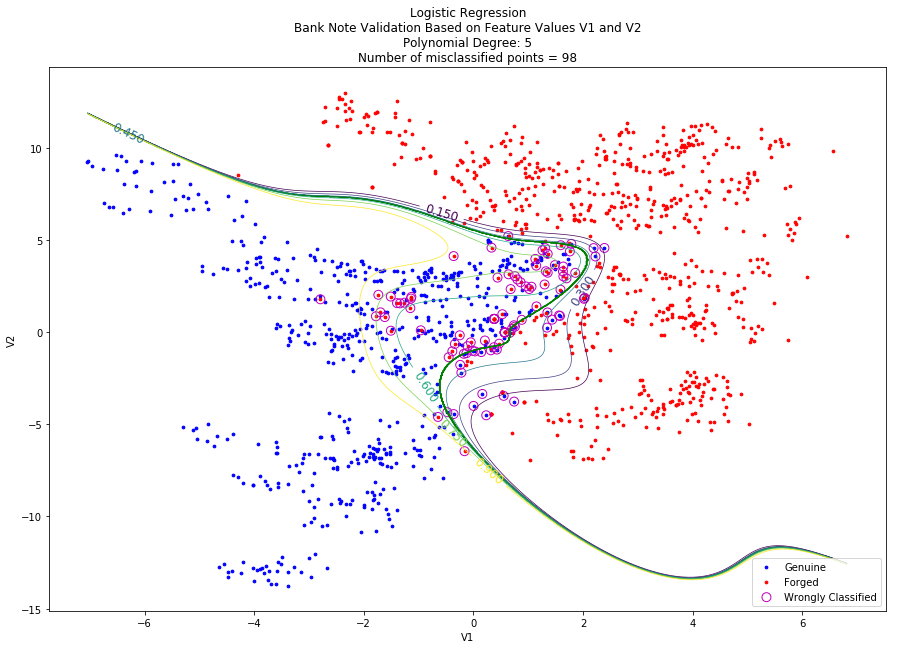

In [20]:
# logistic regression
# NOTE: The contours are probabilities that the bank note is genuine
errors, accuracy, conf_matrix, report, plot = poly_boundary_plot(X_train_v1_v2, 
                                                y_train, 
                                                degree=5, 
                                                show_contours=1)

In [21]:
# Which rows of the dataset are misclassfied?
errors

,V1,V2,V3,V4,Genuine
17,0.803550,2.847300,4.34390,0.601700,0
30,-0.248110,-0.177970,4.90680,0.154290,0
31,1.488400,3.627400,3.30800,0.489210,0
34,-1.616200,0.809080,8.16280,0.608170,0
49,1.634900,3.286000,2.87530,0.087054,0
79,1.131700,3.964700,3.39790,0.843510,0
86,-1.131300,1.903700,7.53390,1.022000,0
95,-0.644720,-4.606200,8.34700,-2.709900,0
123,-1.507500,1.922400,7.14660,0.891360,0
159,1.356600,4.235800,2.13410,0.321100,0


In [22]:
# Classification accuracy
accuracy

0.9285714285714286

In [23]:
# Comfusion Matrix
print(conf_matrix)

[[696  66]
 [ 32 578]]


In [24]:
# True negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()
tn, fp, fn, tp

(696, 66, 32, 578)

In [25]:
# Precision, recall, f1-score
print(report)

             precision    recall  f1-score   support

          0       0.96      0.91      0.93       762
          1       0.90      0.95      0.92       610

avg / total       0.93      0.93      0.93      1372



At some point, just making the model more and more complex will start to produce diminishing returns. At this point it's more data that will help.

We've been working with just 2 of the 4 features -- why not work with all the features available to us? This gives us more predictive power but makes it hard to visualize the boundaries.

We can, however, see how our predictions are going by looking at the rows in the dataset that are misclassified.

## Use all 4 features instead of just V1 and V2

In [26]:
# Set up the inputs
inputs_all = data[['V1', 'V2', 'V3', 'V4']]

In [27]:
# Here are some key stats on the inputs
inputs_all.describe()

,V1,V2,V3,V4
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [28]:
# Turn the inputs into an array of training data
X_all_train = inputs_all.values
X_all_train.shape

(1372, 4)

In [29]:
# Sanity check
X_all_train[0:3]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645]])

In [30]:
# The output remains the same
y_train.shape

(1372,)

In [31]:
# Use the same logistic regression model as before
# Train the model and find the optimal parameter values
lr.fit(X_all_train, y_train)

[LibLinear]

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

In [32]:
# These are the optimal values of w0, w1, w2, w3, and w4
w0 = lr.intercept_[0]
w1 = lr.coef_.squeeze()[0]
w2 = lr.coef_.squeeze()[1]
w3 = lr.coef_.squeeze()[2]
w4 = lr.coef_.squeeze()[3]
print("w0: {}\nw1: {}\nw2: {}\nw3: {}\nw4: {}".format(w0, w1, w2, w3, w4))

w0: 6.7977093065581125
w1: -7.264170431822384
w2: -3.885217128663818
w3: -4.8902809890361185
w4: -0.5436532238010893


In [33]:
# Genuine or fake for the entire data set
y_all_pred = lr.predict(X_all_train)
print(y_all_pred)

[0 0 0 ..., 1 1 1]


In [34]:
lr.score(X_all_train, y_train)

0.99198250728862969

In [35]:
# The probabilities of [Genuine = 0, Genuine = 1]
y_all_pred_probs = lr.predict_proba(X_all_train)
print(y_all_pred_probs)

[[  1.00000000e+00   9.37582493e-18]
 [  1.00000000e+00   2.49232658e-20]
 [  9.99999999e-01   1.24646312e-09]
 ..., 
 [  1.41340716e-01   8.58659284e-01]
 [  4.74684318e-03   9.95253157e-01]
 [  7.96637064e-07   9.99999203e-01]]


In [36]:
# Where did the model misclassify banknotes?
errors = data[data['Genuine'] != y_all_pred]
print('Number of Misclassifications = {}'.format(len(errors)))
errors

Number of Misclassifications = 11


,V1,V2,V3,V4,Genuine
145,0.51950,-3.2633,3.0895,-0.984900,0
320,0.51950,-3.2633,3.0895,-0.984900,0
351,0.51950,-3.2633,3.0895,-0.984900,0
671,0.51947,-3.2633,3.0895,-0.984920,0
716,0.51950,-3.2633,3.0895,-0.984900,0
911,2.03100,1.8520,-3.0121,0.003003,1
918,2.39170,4.5565,-4.9888,-2.898700,1
942,-3.37930,-13.7731,17.9274,-2.032300,1
1094,2.01770,1.7982,-2.9581,0.209900,1
1101,2.19430,4.5503,-4.9760,-2.725400,1


Lesson: With enough data, a linear model is often good enough.

## Summary

We now have in our toolkit ways to make numerical and categorical predictions.

Can you think of a prediction that doesn't predict a numerical value or a category?

Moreover, our dataset can contain any number of features and our features can be complex.

We know how to take linear models and make them into non-linear models to capture more complex patterns in our data.

We can even bandy about fancy terms like logistic regression, penalty functions, gradient descent, support vector machines, and neural networks!